In [1]:
import os, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import time
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 20})

In [2]:
def load_dataframe_from_files(dirin, fileprefix, max_files=1000):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print("[Info] Loading {} files wt prefix:\n{}".format(len(files), fileprefix))
    df = pd.read_csv(files[0], comment='#', index_col=False)
    for file in files[1:max_files]:
        print(".", end='')
        dftmp = pd.read_csv(file, comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    print("")
    return df

# load only first 2 export files

In [5]:
init = time.time()
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Neutrons_VariousConfig_08_20_2020")

fileinprefix = "Export_Ar41_LGND_200_NeutronsInLar_2M_100mmCylinder_01MeV_part*csv"
df = load_dataframe_from_files(dirin, fileinprefix, max_files=2)

print("[Info] Loaded data in {:.3f} seconds".format(time.time() - init))

[Info] Loading 7 files wt prefix:
Export_Ar41_LGND_200_NeutronsInLar_2M_100mmCylinder_01MeV_part*csv
.
[Info] Loaded data in 7.833 seconds


# look for events wt Edep>8MeV

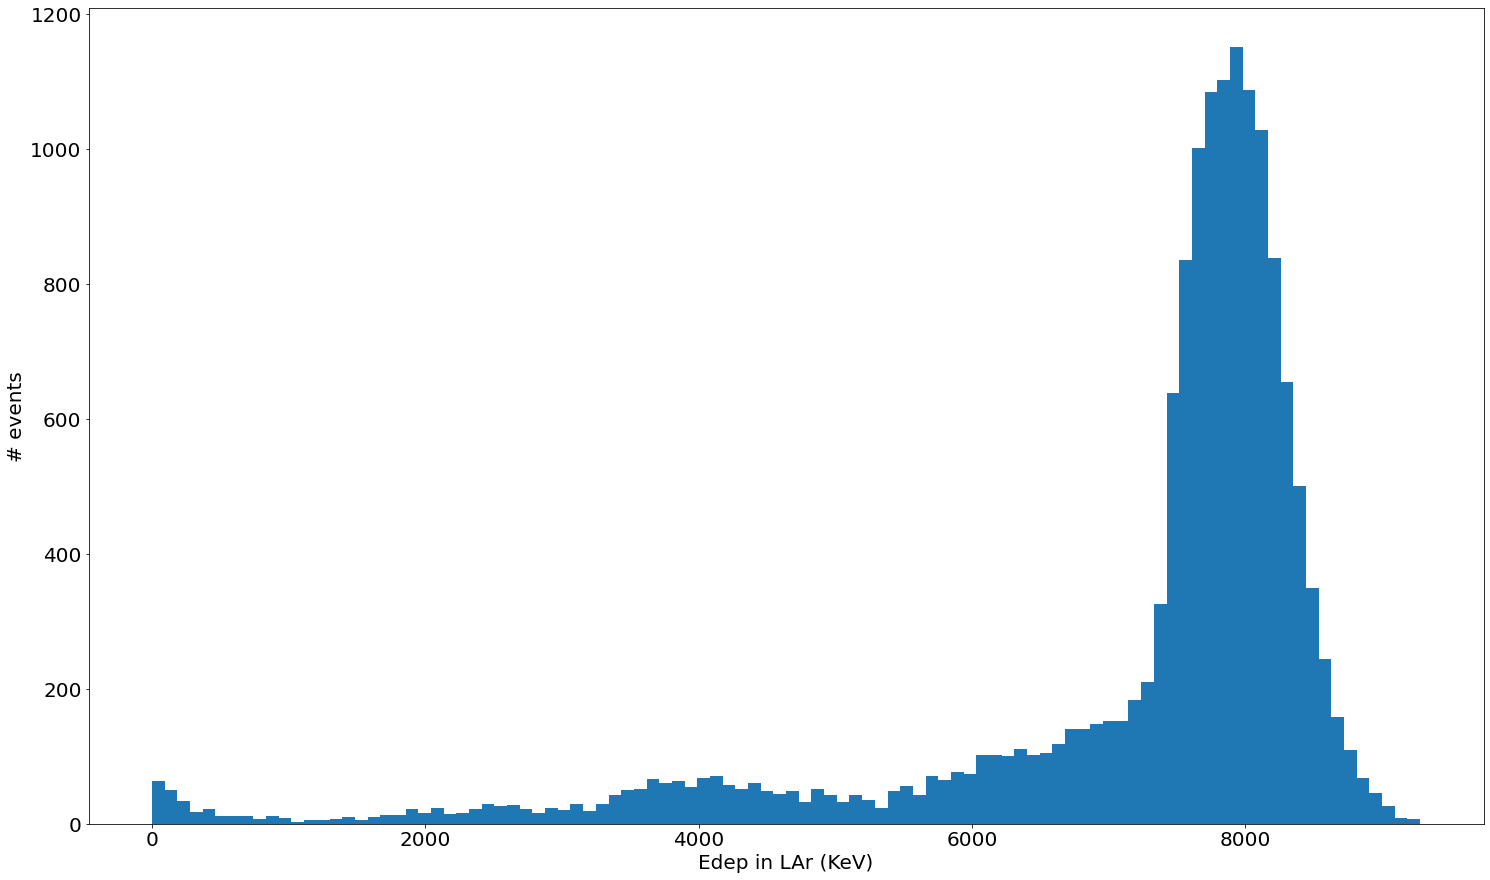

In [14]:
cum_edep = df.groupby("eventnumber").energydeposition.sum()
plt.hist(cum_edep, bins=100)
plt.xlabel("Edep in LAr (KeV)")
plt.ylabel("# events")
plt.show()

In [13]:
cum_edep[cum_edep>8000]

eventnumber
203        8617.668393
370        8762.432173
682        8413.975767
1135       8051.916241
1246       8771.835277
              ...     
1889146    8351.759289
1889261    8431.463949
1889266    8195.686599
1889378    8099.830666
1889386    8257.807220
Name: energydeposition, Length: 4895, dtype: float64

# looking for delta radius

In [57]:
first_n = df[df.PID==2112].groupby("eventnumber").first()
first_ar41 = df[df.PID==1000180410].groupby("eventnumber").first()

In [61]:
radius_n_prod = (first_n.x**2 + first_n.y**2 + first_n.z**2)**.5
radius_ar41_prod = (first_ar41.x**2 + first_ar41.y**2 + first_ar41.z**2)**.5

In [68]:
events_wt_high_radius = radius_ar41_prod[radius_ar41_prod>1500].index

In [69]:
df[df.eventnumber.isin(events_wt_high_radius)].groupby("eventnumber").energydeposition.sum()

eventnumber
211        6600.666181
226          55.591152
258        4385.423939
298        7432.547502
367        2523.377563
              ...     
1889451    7948.439493
1889479     940.320403
1889493    5196.327384
1889567    7452.776855
1889591    7898.286048
Name: energydeposition, Length: 7082, dtype: float64

# for example, event 1889591

In [70]:
event = df[df.eventnumber==1889591]
event.energydeposition.sum()

7898.286048264662

In [71]:
event[event.PID==1000180410]

,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,eventnumber,tracknumber,creatorprocess,material,SensitiveVolumeID
2499432,1000180410,1,0.0000,0.2559,117130.783466,241.354099,-519.177428,1527.080860,1889591,7,nCapture,ArgonLiquid,201
2499433,1000180410,1,0.2559,0.0000,117130.784643,241.354078,-519.177441,1527.080828,1889591,7,ionIoni,ArgonLiquid,201


In [75]:
event["r"] = (event.x**2 + event.y**2 + event.z**2)**.5

/home/luigi/Development/ML4NP/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
event[event.PID==2112][["PID", "kineticenergy", "time", "r"]]

,PID,kineticenergy,time,r
2499402,2112,175.533680,0.000000,35.050350
2499403,2112,175.533680,0.000000,35.050350
2499404,2112,172.785593,5.153391,45.790384
2499405,2112,165.986510,5.767563,45.527174
2499406,2112,1.954064,582.510390,186.447531
2499407,2112,1.731504,1349.579137,249.562667
2499408,2112,0.874372,2345.575700,222.634005
2499409,2112,0.871868,3077.591037,332.453670
2499410,2112,0.392734,3720.970545,440.661364
2499411,2112,0.363733,4671.811503,669.361475


In [91]:
event.sort_values("time")[:10][["PID", "kineticenergy", "time", "creatorprocess"]]

,PID,kineticenergy,time,creatorprocess
2499402,2112,175.533680,0.000000,primaryParticle
2499403,2112,175.533680,0.000000,NaN
2499404,2112,172.785593,5.153391,hadElastic
2499405,2112,165.986510,5.767563,hadElastic
2499406,2112,1.954064,582.510390,hadElastic
2499407,2112,1.731504,1349.579137,hadElastic
2499408,2112,0.874372,2345.575700,hadElastic
2499409,2112,0.871868,3077.591037,hadElastic
2499410,2112,0.392734,3720.970545,hadElastic
2499411,2112,0.363733,4671.811503,hadElastic


In [110]:
event[event.ParentTrackID==1].groupby("tracknumber").first()

,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,eventnumber,creatorprocess,material,SensitiveVolumeID,r
tracknumber,,,,,,,,,,,,,
4,22,1,0.0,1827.905391,117130.783466,241.354099,-519.177428,1527.08086,1889591,nCapture,ArgonLiquid,201,1630.881037
6,22,1,0.0,167.304352,117130.783466,241.354099,-519.177428,1527.08086,1889591,nCapture,ArgonLiquid,201,1630.881037
7,1000180410,1,0.0,0.255900,117130.783466,241.354099,-519.177428,1527.08086,1889591,nCapture,ArgonLiquid,201,1630.881037


In [109]:
event[event.creatorprocess=="nCapture"]

,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,eventnumber,tracknumber,creatorprocess,material,SensitiveVolumeID,r
2499432,1000180410,1,0.0,0.255900,117130.783466,241.354099,-519.177428,1527.08086,1889591,7,nCapture,ArgonLiquid,201,1630.881037
2499527,22,1,0.0,167.304352,117130.783466,241.354099,-519.177428,1527.08086,1889591,6,nCapture,ArgonLiquid,201,1630.881037
2499728,22,1,0.0,1827.905391,117130.783466,241.354099,-519.177428,1527.08086,1889591,4,nCapture,ArgonLiquid,201,1630.881037
